# 🧪 Nonparametric Statistical Tests Demo

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg

sns.set_style('whitegrid')


## Mann-Whitney U Test

Mann-Whitney Normality Check:
             W          pval  normal
Col1  0.947966  2.976057e-12   False
Col2  0.962373  5.252833e-10   False


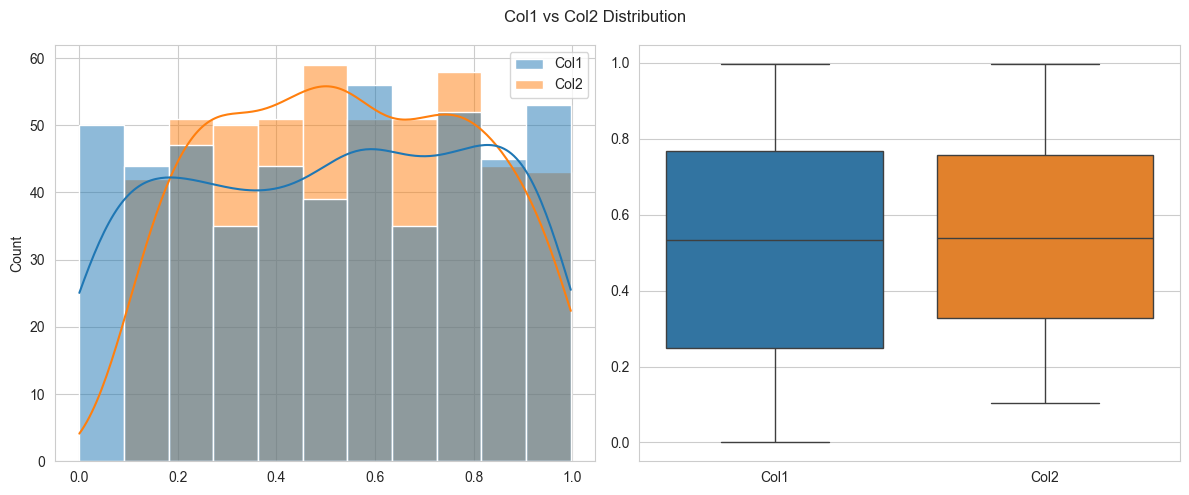


Mann-Whitney U Test Result:
         U-val alternative     p-val       RBC      CLES
MWU  116963.0   two-sided  0.078437 -0.064296  0.467852


In [2]:

np.random.seed(1)
df_mwu = pd.DataFrame({
    'Col1': np.random.uniform(0, 1, 500),
    'Col2': np.random.uniform(0.1, 1, 500)
})

# Normality Check
print("Mann-Whitney Normality Check:")
print(pg.normality(data=df_mwu, alpha=0.05))

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(data=df_mwu, kde=True, ax=axes[0])
sns.boxplot(data=df_mwu, ax=axes[1])
plt.suptitle("Col1 vs Col2 Distribution")
plt.tight_layout()
plt.show()

# Mann-Whitney U Test
mwu_result = pg.mwu(x=df_mwu['Col1'], y=df_mwu['Col2'])
print("\nMann-Whitney U Test Result:\n", mwu_result)


## Wilcoxon Test


Wilcoxon Normality Check:
             W      pval  normal
Col3  0.879760  0.070778    True
Col4  0.722989  0.000952   False


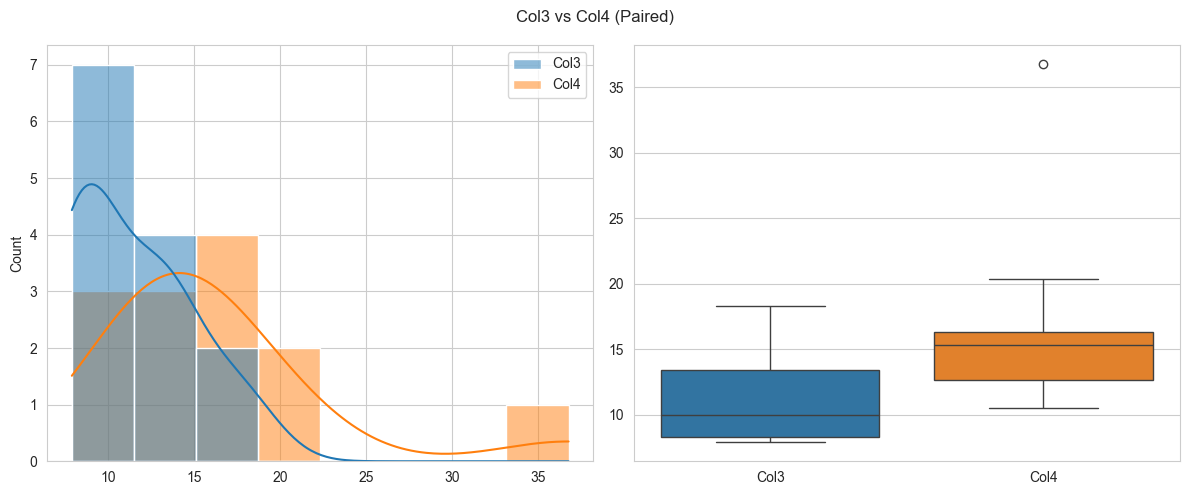


Wilcoxon Test Result:
           W-val alternative     p-val       RBC      CLES
Wilcoxon   16.0   two-sided  0.039795 -0.648352  0.224852


In [3]:

df_wilcoxon = pd.DataFrame({
    'Col3': [18.3, 13.3, 16.5, 12.6, 9.5, 13.6, 8.1, 8.9, 10, 8.3, 7.9, 8.1, 13.4],
    'Col4': [12.7, 11.1, 15.3, 12.7, 10.5, 15.6, 11.2, 14.2, 16.3, 15.5, 19.9, 20.4, 36.8]
})

# Normality
print("\nWilcoxon Normality Check:")
print(pg.normality(data=df_wilcoxon, alpha=0.05))

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(data=df_wilcoxon, kde=True, ax=axes[0])
sns.boxplot(data=df_wilcoxon, ax=axes[1])
plt.suptitle("Col3 vs Col4 (Paired)")
plt.tight_layout()
plt.show()

# Wilcoxon Test
wilcoxon_result = pg.wilcoxon(x=df_wilcoxon['Col3'], y=df_wilcoxon['Col4'])
print("\nWilcoxon Test Result:\n", wilcoxon_result)


## Kruskal-Wallis Test


Kruskal-Wallis Normality by Group:
                W      pval  normal
Metric                             
Product  0.886347  0.023054   False
Client   0.935938  0.200725    True
Action   0.955717  0.462202    True


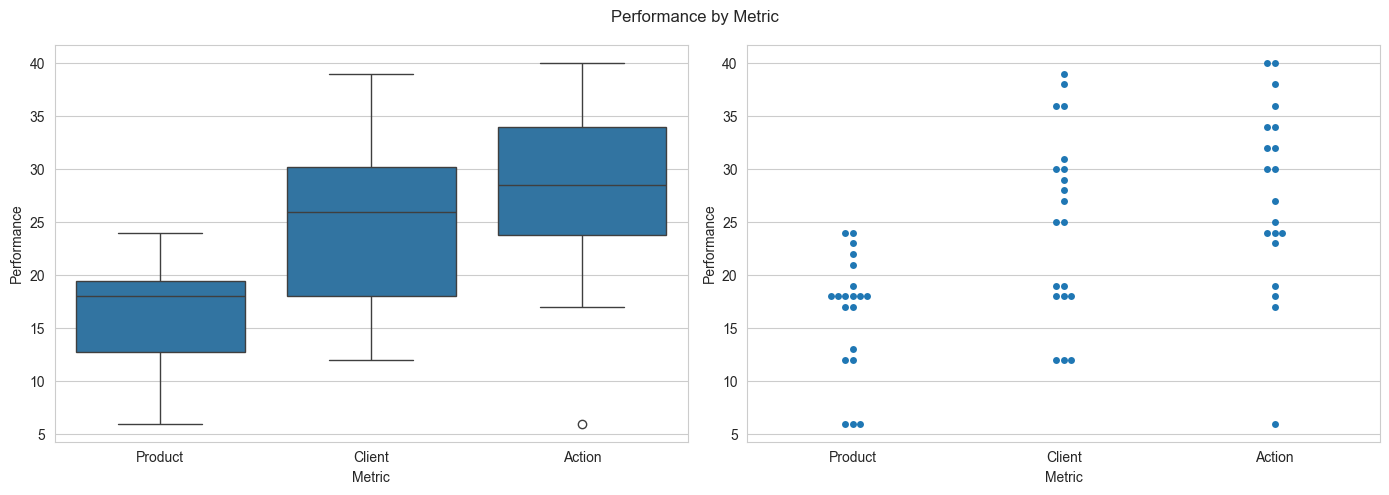


Kruskal-Wallis Test Result:
          Source  ddof1          H     p-unc
Kruskal  Metric      2  17.914541  0.000129


In [4]:

df_kruskal = pg.read_dataset("rm_anova2")[['Metric', 'Performance']]

# Normality Check
print("\nKruskal-Wallis Normality by Group:")
print(pg.normality(data=df_kruskal, dv='Performance', group='Metric'))

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.boxplot(data=df_kruskal, x="Metric", y="Performance", ax=axes[0])
sns.swarmplot(data=df_kruskal, x="Metric", y="Performance", ax=axes[1])
plt.suptitle("Performance by Metric")
plt.tight_layout()
plt.show()

# Kruskal-Wallis Test
kruskal_result = pg.kruskal(data=df_kruskal, dv='Performance', between='Metric')
print("\nKruskal-Wallis Test Result:\n", kruskal_result)


## Summary

In [5]:

print("\n🔍 SUMMARY")
print(f"Mann-Whitney p-val: {mwu_result['p-val'].values[0]:.4f} → {'Reject' if mwu_result['p-val'].values[0] < 0.05 else 'Fail to Reject'} H0")
print(f"Wilcoxon p-val: {wilcoxon_result['p-val'].values[0]:.4f} → {'Reject' if wilcoxon_result['p-val'].values[0] < 0.05 else 'Fail to Reject'} H0")
print(f"Kruskal-Wallis p-val: {kruskal_result['p-unc'].values[0]:.4f} → {'Reject' if kruskal_result['p-unc'].values[0] < 0.05 else 'Fail to Reject'} H0")



🔍 SUMMARY
Mann-Whitney p-val: 0.0784 → Fail to Reject H0
Wilcoxon p-val: 0.0398 → Reject H0
Kruskal-Wallis p-val: 0.0001 → Reject H0
